In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [2]:
from sklearn.datasets import load_breast_cancer
X, Y = load_breast_cancer(return_X_y = True)
load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
print("Features shape : ", X.shape)
print("Label shape : ", Y.shape)

Features shape :  (569, 30)
Label shape :  (569,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.45, random_state = 74)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
print("Accuracy is ", sklearn.metrics.accuracy_score(Y_test, Y_pred))

Accuracy is  0.8988326848249028


In [10]:
confusion_matrix(Y_test, Y_pred)

array([[ 76,  14],
       [ 12, 155]])

In [11]:
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.9171597633136095
recall: 0.9281437125748503


In [13]:
label = ['Benign','Malignant']
Y_pred = dtc.predict(X[17].reshape(1, -1))
print("Predicted : ",label[int(Y_pred)])
print("Actual : ",label[Y[17]])

Predicted :  Benign
Actual :  Benign


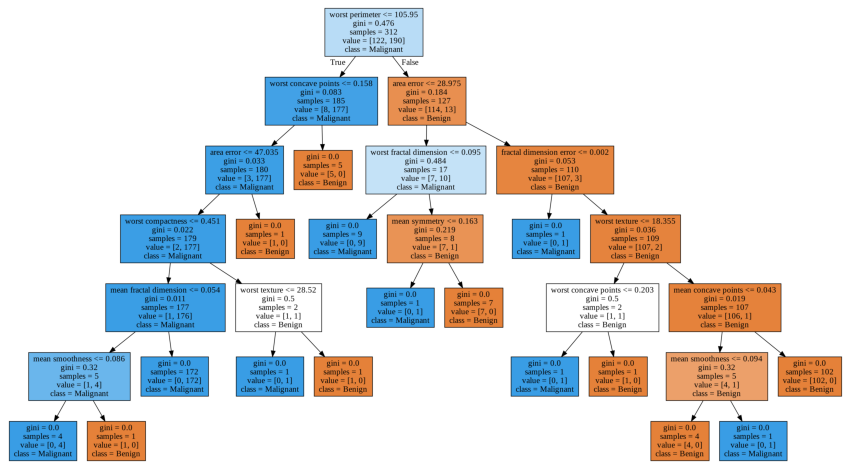

In [14]:
export_graphviz(dtc, out_file='tree_2.dot',
               feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                              'mean smoothness', 'mean compactness', 'mean concavity',
                              'mean concave points', 'mean symmetry', 'mean fractal dimension',
                              'radius error', 'texture error', 'perimeter error', 'area error',
                              'smoothness error', 'compactness error', 'concavity error',
                              'concave points error', 'symmetry error',
                              'fractal dimension error', 'worst radius', 'worst texture',
                              'worst perimeter', 'worst area', 'worst smoothness',
                              'worst compactness', 'worst concavity', 'worst concave points',
                              'worst symmetry', 'worst fractal dimension'],
               class_names=['Benign','Malignant'], 
               filled=True)

call(['dot', '-Tpng', 'tree_2.dot', '-o', 'tree_2.png', '-Gdpi=600'])

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('tree_2.png'))
plt.axis('off');
plt.show();